# Information Visualization
## Dataset : World Happiness Records (2015-2023)

---

### **Introduction**
The below visualizations are the analysis of the World Happiness Records dataset spanning from 2015 to 2023. This dataset provides insights into the happiness levels of various countries based on multiple factors. Through this , we aim to explore trends, relationships, and patterns within the data, ultimately enabling meaningful visualizations and analyses.

---

### **Dataset Overview**
In the code below, we start by loading the **World Happiness Records** dataset. The initial step involves preparing the dataset for analysis by performing the following essential cleaning operations:

1. **Removing Null Values**: Rows with missing data are dropped to ensure the integrity of the analysis.
2. **Dropping Duplicates**: Duplicate entries are eliminated to maintain data uniqueness.
3. **Converting Data Types**: Columns with numerical information are converted to numeric types for consistency and analysis.
4. **Standardizing Country Names**: Country names are standardized to align with the `world` library for accurate geospatial visualizations.
5. **Handling Invalid Values**: Erroneous or extreme values are addressed to avoid distortions in analysis.

These steps establish a clean and reliable foundation for the subsequent exploration and visualization.


In [ ]:
import pandas as pd
import requests
from io import StringIO

# Function to convert a Google Drive URL to a direct download link
def get_direct_download_url(drive_url):
    file_id = drive_url.split('/')[5]
    direct_url = f"https://drive.google.com/uc?export=download&id={file_id}"
    return direct_url

# List of file paths for the Excel sheets
file_paths = [
    'https://drive.google.com/file/d/1fPzZA13fvkvs5RggxYjOa2K-1YxSK2oC/view?usp=drive_link',
    'https://drive.google.com/file/d/1R4r3u1rLJrXPnOEfumdqyC0G2r-AMI3E/view?usp=drive_link',
    'https://drive.google.com/file/d/1RNpTDeUHNITM1YmsAEQy8eyIQ6c-1DnR/view?usp=drive_link',
    'https://drive.google.com/file/d/1sjvJk2p3dgYctBG1NdycWh1DQRz5SrDL/view?usp=drive_link',
    'https://drive.google.com/file/d/12-cSFFq_t-YXd7iFaK46wUaC5FlSs0L2/view?usp=drive_link',
    'https://drive.google.com/file/d/1DikZ-u5E8OrFU5oxe4cRyjWj8qVe-WUf/view?usp=drive_link',
    'https://drive.google.com/file/d/1UQOZJywK9sx6C3dwqcYCFPQqVeUuPERD/view?usp=drive_link',
    'https://drive.google.com/file/d/1-xPXQ-8CAQb1sBLNCnfMS9_XopRy0jiu/view?usp=drive_link',
    'https://drive.google.com/file/d/1JVS2jRlaQq3ve8bJlucgcp8S_R1KVnkC/view?usp=drive_link'
]

# List to store DataFrames
dfs = []

# Downloading each file and appending the DataFrame to the list
for file in file_paths:
    download_url = get_direct_download_url(file)
    response = requests.get(download_url)
    if response.status_code == 200:
        # Load the CSV content into a DataFrame
        df = pd.read_csv(StringIO(response.text))
        dfs.append(df)
    else:
        print(f"Failed to download file: {file}")

# Merging all DataFrames
merged_df = pd.concat(dfs, ignore_index=True)

# Step 1: Handling missing values
# Option 1: Dropping rows with missing values
merged_df.dropna(inplace=True)

# Step 2: Removing duplicates
merged_df.drop_duplicates(inplace=True)

# Step 3: Checking data types
# Assuming relevant columns that should be numeric
numeric_cols = ['happiness_score', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']

# Converting these columns to numeric, ignoring errors (coerce)
merged_df[numeric_cols] = merged_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Replacing few of the country name according to the one's present in the world map name syntax in the ne_110m_admin_0_countries.shp library used for visualizing world plots.
# Create a dictionary mapping merged_df country names to world map names
country_name_mapping = {
    'United States': 'United States of America',
    'South Korea': 'South Korea',
    'Taiwan': 'Taiwan Province of China',
    'Czechia': 'Czech Republic',
    'North Cyprus': 'N. Cyprus',
    'Ivory Coast': "CÃ´te d'Ivoire",
    'China': 'China',
    'Taiwan Province of China': 'Taiwan',
    'United Kingdom': 'United Kingdom',
    'United Arab Emirates': 'United Arab Emirates',
    'United States of America': 'United States of America',
    'South Korea': 'South Korea',
    'Qatar': 'Qatar',
    'Turkey': 'Turkey',
    'Russia': 'Russia',
    'Sri Lanka': 'Sri Lanka',
    'S. Sudan': 'South Sudan',
    'Mauritius': 'Mauritius',
    'Myanmar': 'Myanmar',
    'Bosnia and Herz.': 'Bosnia and Herzegovina',
    'Brunei': 'Brunei Darussalam',
    'Swaziland': 'Eswatini',
    'Fr. S. Antarctic Lands': 'Fr. S. Antarctic Lands',
    'Falkland Is.': 'Falkland Islands',
    'Timor-Leste': 'Timor-Leste',
    'Fr. S. Antarctic Lands': 'Fr. S. Antarctic Lands',
    'Solomon Is.': 'Solomon Islands',
    'Syria': 'Syria',
    'Somaliland region': 'Somaliland',
    'Kosovo': 'Kosovo',
    'N. Cyprus': 'Northern Cyprus',
    'Central African Republic': 'Central African Rep.',
    'Republic of Congo': 'Congo',
    'Czechia': 'Czech Republic',
    'Romania': 'Romania',
    'Palestinian Territories': 'Palestine',
    'Trinidad and Tobago': 'Trinidad and Tobago',
    'Moldova': 'Moldova',
    'Guinea': 'Guinea',
    'Greece': 'Greece',
    'Dominican Republic': 'Dominican Rep.',
    'Rwanda': 'Rwanda',
    'Bhutan': 'Bhutan',
    'Zambia': 'Zambia',
    'Malta': 'Malta',
    'Suriname': 'Suriname',
    'Mongolia': 'Mongolia',
    'Angola': 'Angola',
    'Gabon': 'Gabon',
    'Yemen': 'Yemen',
    'Guinea-Bissau': 'Guinea-Bissau',
    'Eritrea': 'Eritrea',
    'Botswana': 'Botswana',
    'Cuba': 'Cuba',
    'Kuwait': 'Kuwait',
    'Mexico': 'Mexico',
    'El Salvador': 'El Salvador',
    'Chad': 'Chad',
    'Lesotho': 'Lesotho',
    'Vanuatu': 'Vanuatu',
    'Iceland': 'Iceland',
    'Gambia': 'Gambia',
    'Timor-Leste': 'Timor-Leste',
    'Pakistan': 'Pakistan',
    'Kazakhstan': 'Kazakhstan',
    'Ecuador': 'Ecuador',
    'Venezuela': 'Venezuela',
    'Israel': 'Israel',
    'Algeria': 'Algeria',
    'Jordan': 'Jordan',
    'Zimbabwe': 'Zimbabwe',
    'Singapore': 'Singapore',
    'Japan': 'Japan',
    'Norway': 'Norway',
    'Palestine': 'Palestine',
    'Mali': 'Mali',
    'Uzbekistan': 'Uzbekistan',
    'Mongolia': 'Mongolia',
    'Honduras': 'Honduras',
    'Belize': 'Belize',
    'Armenia': 'Armenia',
    'Zambia': 'Zambia',
    'Kenya': 'Kenya',
    'Ethiopia': 'Ethiopia',
    'Vietnam': 'Vietnam',
    'Somalia': 'Somalia',
    'Kazakhstan': 'Kazakhstan',
    'Nicaragua': 'Nicaragua',
    'Congo': 'Congo (Brazzaville)',
    'Botswana': 'Botswana',
    'Venezuela': 'Venezuela',
    'Saudi Arabia': 'Saudi Arabia',
    'Mauritania': 'Mauritania',
    'Tunisia': 'Tunisia',
    'Haiti': 'Haiti',
    'Suriname': 'Suriname',
    'Palestine': 'Palestine',
    'Lebanon': 'Lebanon',
    'Belize': 'Belize',
    'Mali': 'Mali',
    'Mozambique': 'Mozambique',
    'Rwanda': 'Rwanda',
    'Czechia': 'Czech Republic',
    'Mauritius': 'Mauritius',
    'Oman': 'Oman',
    'Jordan': 'Jordan',
    'Kazakhstan': 'Kazakhstan',
    'South Sudan': 'South Sudan',
    'Malawi': 'Malawi',
    'Eritrea': 'Eritrea',
    'Ethiopia': 'Ethiopia',
    'Djibouti': 'Djibouti',
    'Madagascar': 'Madagascar',
    'Guatemala': 'Guatemala',
    'Mozambique': 'Mozambique',
    'Venezuela': 'Venezuela',
}

# Apply the mapping to the 'country' column in merged_df
merged_df['country'] = merged_df['country'].replace(country_name_mapping)

# Step 4: Handling invalid values
merged_df = merged_df[(merged_df[numeric_cols] >= 0).all(axis=1)]

# Step 5: Saving the cleaned DataFrame to a new CSV file
merged_df.to_csv('Cleaned_Merged_WHR.csv', index=False)

# Output statistics for validation
merged_df.describe()

merged_df.head(28)
merged_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1365 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          1365 non-null   int64  
 1   country                       1365 non-null   object 
 2   region                        1365 non-null   object 
 3   happiness_score               1365 non-null   float64
 4   gdp_per_capita                1365 non-null   float64
 5   social_support                1365 non-null   float64
 6   healthy_life_expectancy       1365 non-null   float64
 7   freedom_to_make_life_choices  1365 non-null   float64
 8   generosity                    1365 non-null   float64
 9   perceptions_of_corruption     1365 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 117.3+ KB



### **Yearly Happiness Scores for some of the Countries (2015-2023)**

The heatmap below showcases the yearly happiness scores from 2015 to 2023 for a selected list of well-known countries worldwide. This visualization helps track trends over time and compare happiness levels between countries.  

- **Color Gradient**: Darker shades(red) represent higher happiness scores.  
- **Focus**: The chart highlights countries across various regions, allowing us to observe changes and patterns in their happiness scores over the years.


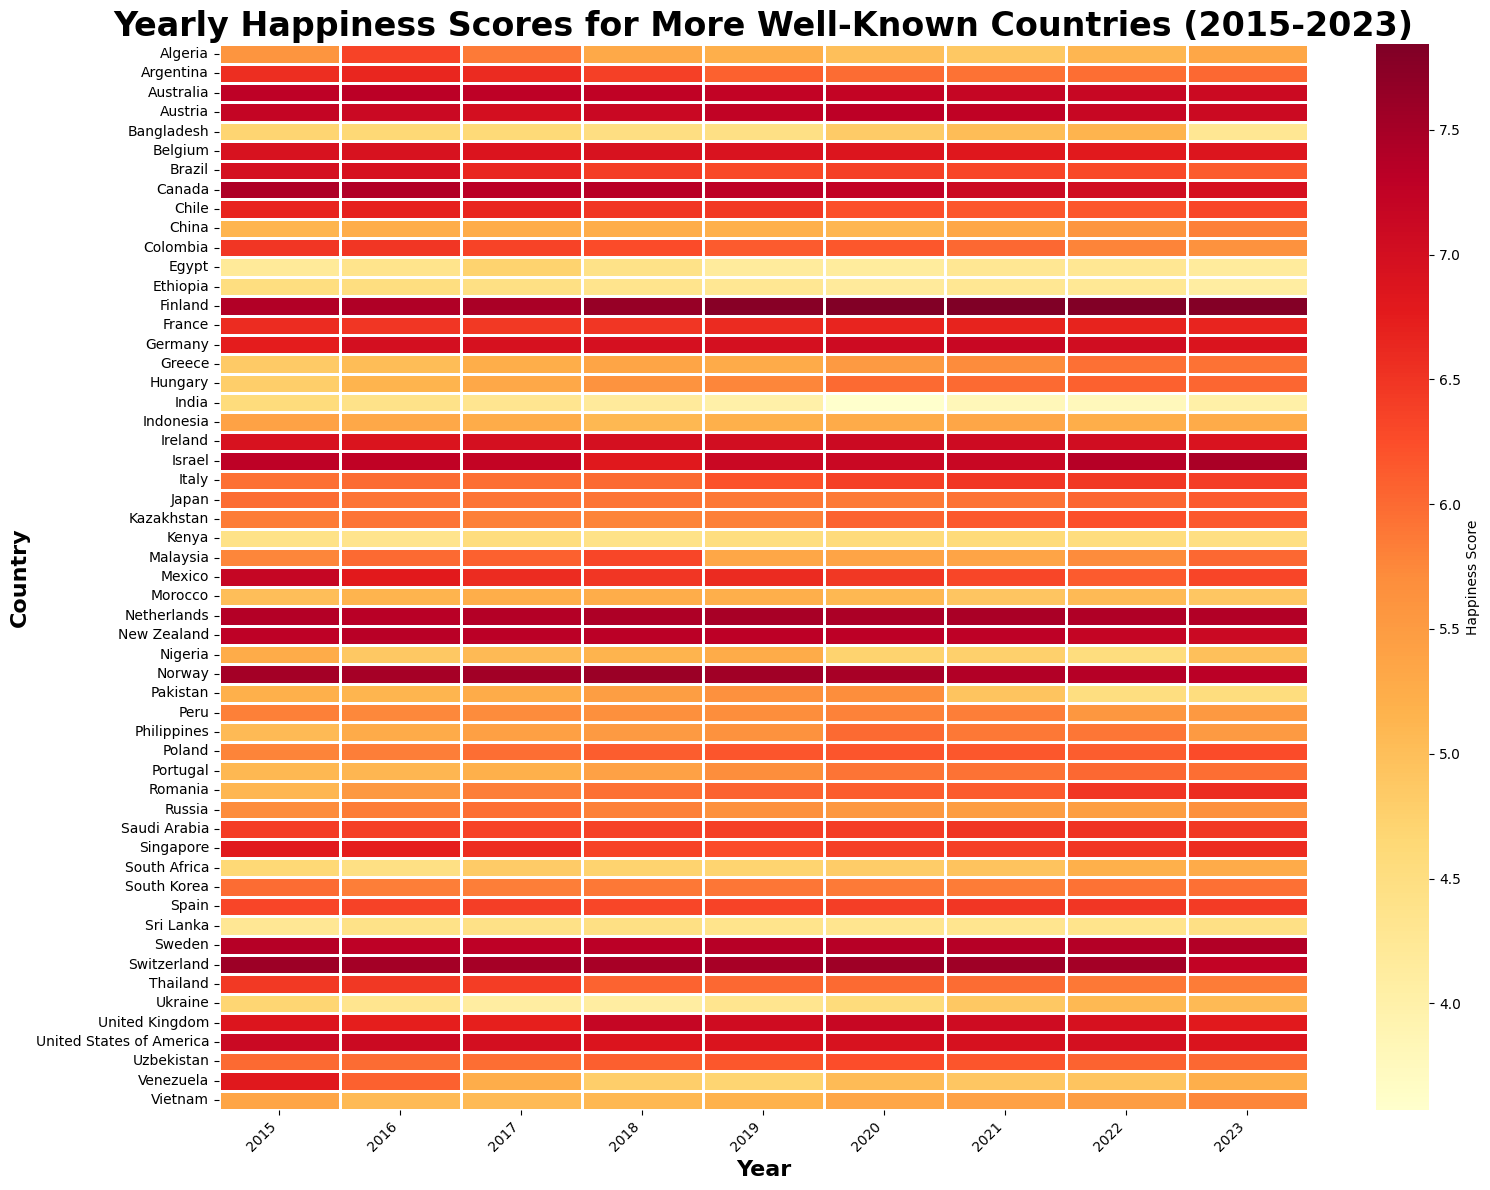

In [ ]:
# Expanded list with even more well-known countries globally

import seaborn as sns
import matplotlib.pyplot as plt

more_known_countries = countries = [
    'United States of America', 'India', 'China', 'Brazil', 'Germany',
    'Japan', 'France', 'United Kingdom', 'Canada', 'Australia',
    'South Korea', 'Russia', 'South Africa', 'Mexico', 'Italy',
    'Spain', 'Sweden', 'Switzerland', 'Netherlands', 'Saudi Arabia',
    'Argentina', 'Egypt', 'Indonesia', 'Norway', 'Malaysia',
    'Pakistan', 'Bangladesh', 'Vietnam', 'Philippines', 'Thailand',
    'Nigeria', 'Kenya', 'Colombia', 'Peru', 'Chile',
    'New Zealand', 'Greece', 'Portugal', 'Belgium', 'Poland',
     'Austria', 'Singapore', 'Finland',
    'Ireland', 'Hungary', 'Israel',
     'Venezuela', 'Ethiopia', 'Morocco', 'Algeria',
    'Ukraine', 'Romania', 'Sri Lanka', 'Kazakhstan', 'Uzbekistan'
]


# Filter the dataset to include only these countries
more_known_countries_data = merged_df[merged_df['country'].isin(more_known_countries)]
#print(merged_df['country'].isin(more_known_countries))
#print(df.iloc[2])
#demo = merged_df['country'].isin(['China'])

# Create a pivot table for the filtered countries
country_region_data_more = more_known_countries_data.pivot_table(index='country', columns='year', values='happiness_score')
#print(country_region_data_more)

# Plot the heatmap for these countries
plt.figure(figsize=(16, 12))
sns.heatmap(country_region_data_more, cmap='YlOrRd', annot=False, linewidths=0.8, cbar_kws={'label': 'Happiness Score'})

# Improve readability with clear labels
plt.title('Yearly Happiness Scores for More Well-Known Countries (2015-2023)', fontsize=24, fontweight='bold')
plt.xlabel('Year', fontsize=16, fontweight='bold')
plt.ylabel('Country', fontsize=16, fontweight='bold')

# Rotate labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()



### **Average Happiness Scores by Region (2015-2023)**

The line chart below illustrates the trends in average happiness scores across different regions from 2015 to 2023. Each line represents a region, allowing us to compare their happiness levels and observe changes over time.  

- **Focus**: Regions are grouped, and their average happiness scores are calculated for each year.  
- Distinct colors are assigned to each region for clarity.  
- Visualizations focus on looking for consistent patterns, improvements, or declines within and across regions.  


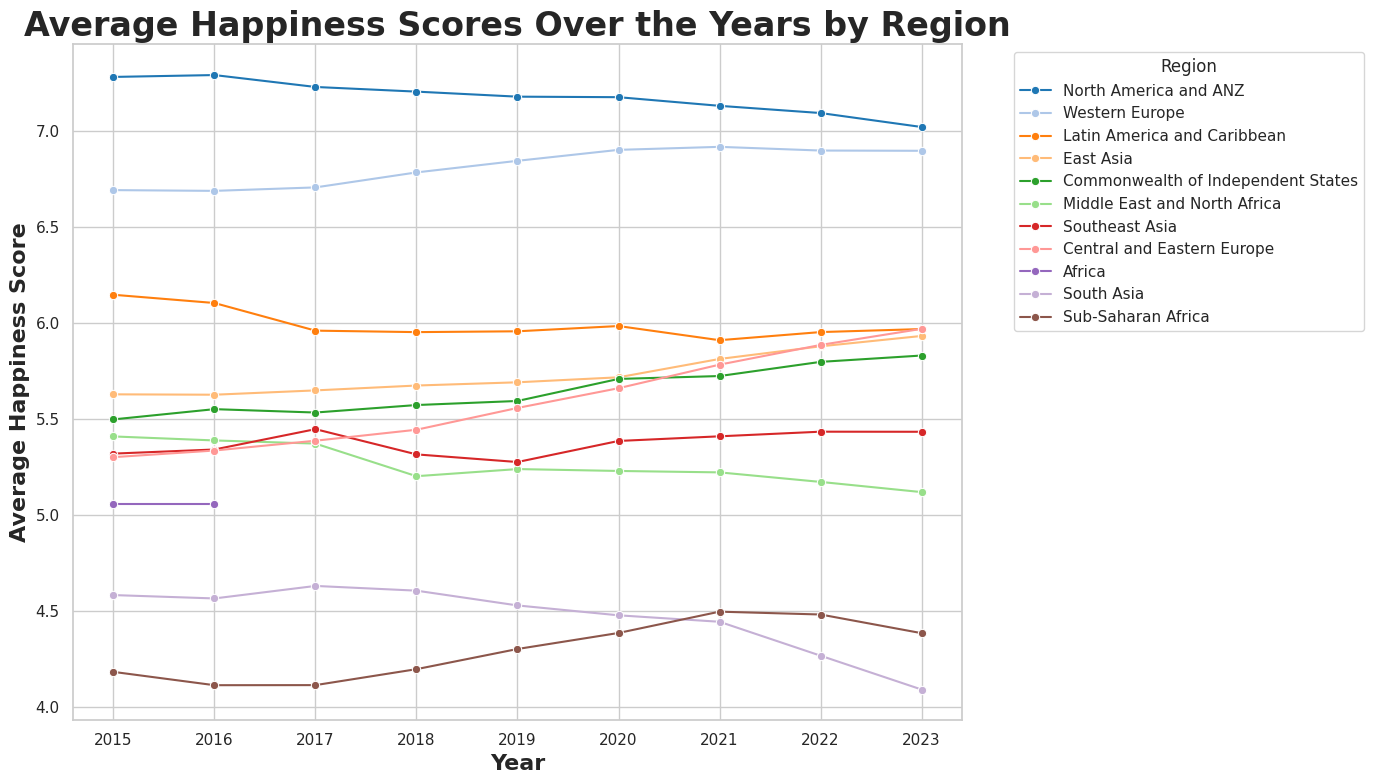

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the merged_df dataset ready with 'region' and 'happiness_score' columns
sns.set(style="whitegrid")

# Group by year and region to get the mean happiness score
region_data = merged_df.groupby(['year', 'region'])['happiness_score'].mean().reset_index()

# Define the custom order for the legend
custom_region_order = [
    'North America and ANZ',
    'Western Europe',
    'Latin America and Caribbean',
    'East Asia',
    'Commonwealth of Independent States',
    'Middle East and North Africa',
    'Southeast Asia',
    'Central and Eastern Europe',
    'Africa',
    'South Asia',
    'Sub-Saharan Africa'
]

# Define a color palette with more distinguishable colors (tab20 provides 20 distinct colors)
color_palette = sns.color_palette("tab20", n_colors=len(custom_region_order))

plt.figure(figsize=(14, 8))
sns.lineplot(data=region_data, x='year', y='happiness_score', hue='region', marker='o',
             palette=color_palette, hue_order=custom_region_order)

plt.title('Average Happiness Scores Over the Years by Region', fontsize=24,fontweight='bold')
plt.xlabel('Year', fontsize=16,fontweight='bold')
plt.ylabel('Average Happiness Score', fontsize=16,fontweight='bold')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### **Change in Health Life Expectancy by Country (2015–2023)**

The map below illustrates the change in health life expectancy for countries worldwide between 2015 and 2023.  

- **Color Coding**:  
  - A warm color gradient (Yellow-Orange-Red) highlights the extent of change.  
  - Countries with significant increases are shown in darker shades of red and countires with decrease in healthy life expectancy over the years are shown in lighter shades of yellow

- **Focus**: This map enables us to identify countries that experienced positive or negative shifts in health life expectancy over the years


Mounted at /content/drive


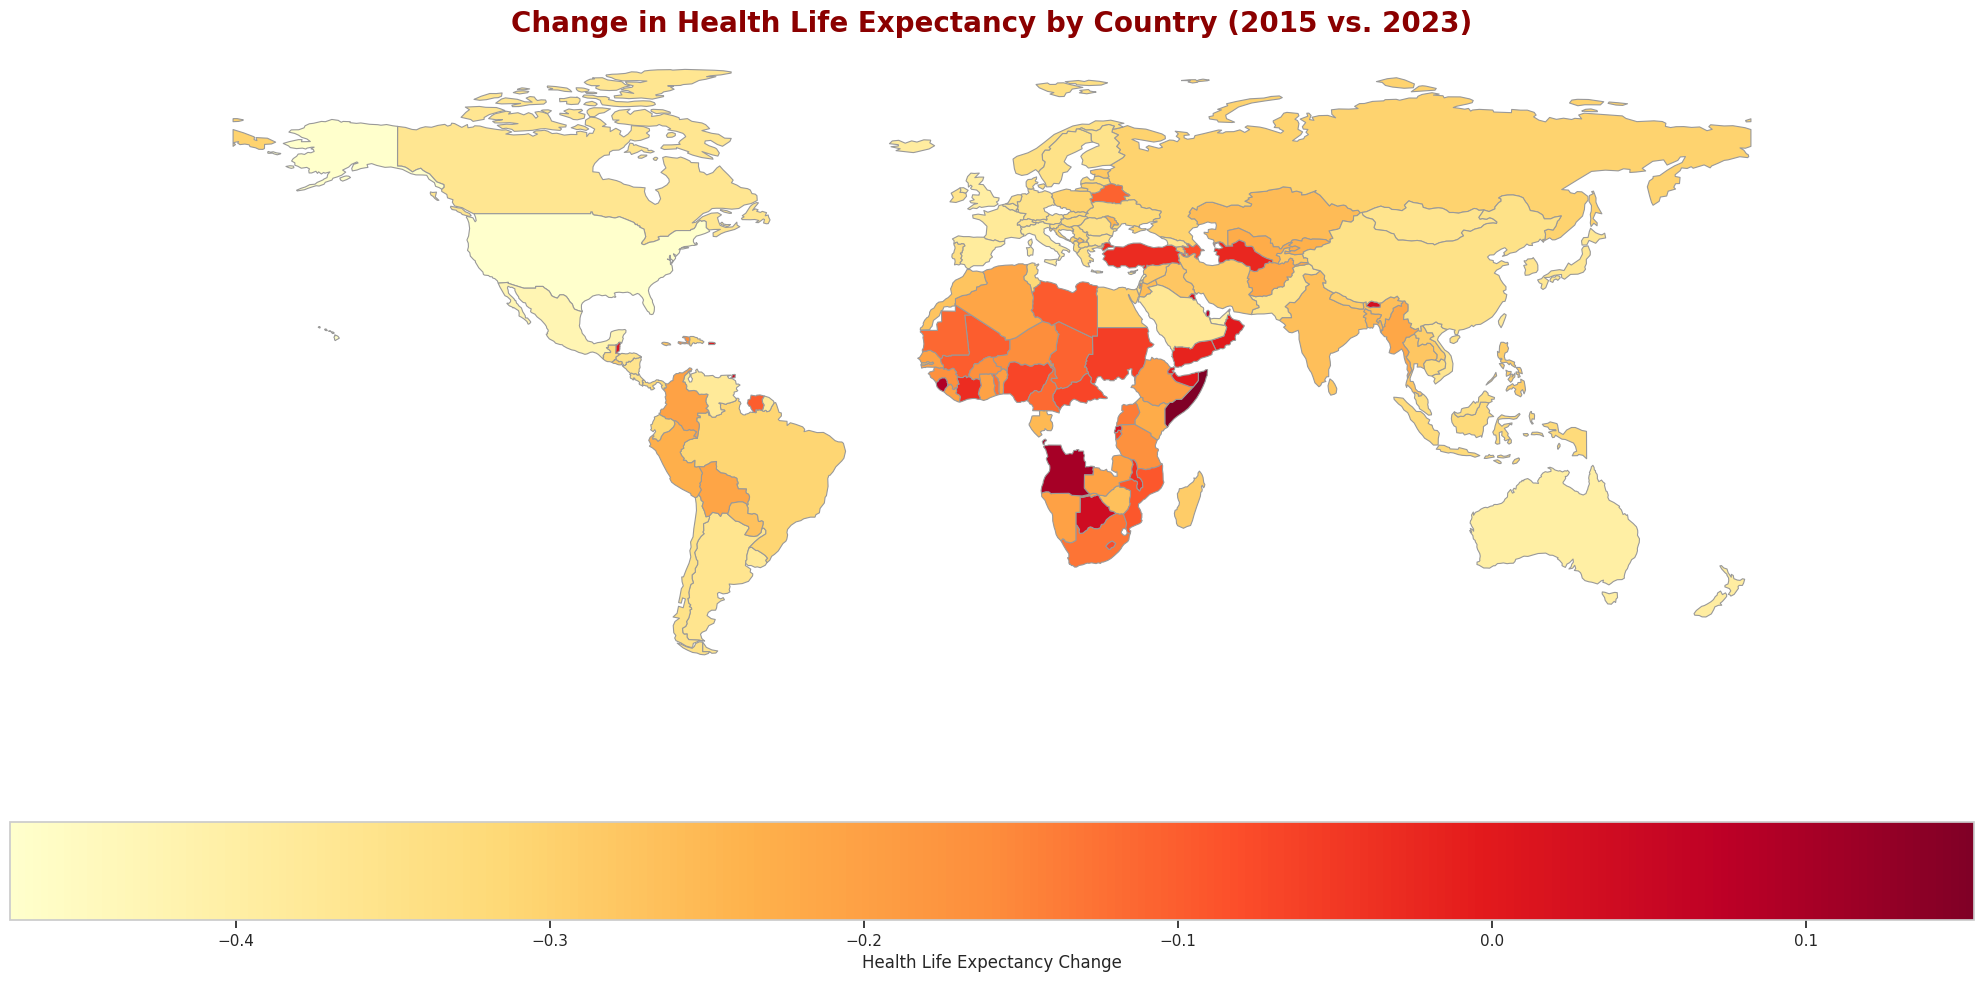

167


In [ ]:

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

### Step 1: Load the world shapefile data (Natural Earth countries shapefile)
shapefile_path = '/content/drive/MyDrive/IS Mid Term Report/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Step 2: Load your happiness and health life expectancy data
# merged_df = pd.read_csv('merged_happiness_data.csv')  # Uncomment and replace with the correct path

# Calculate change in health life expectancy
first_year_health = merged_df.groupby('country')['year'].min().reset_index()
last_year_health = merged_df.groupby('country')['year'].max().reset_index()

# Extract health life expectancy data for the first and last years
first_health_scores = pd.merge(merged_df, first_year_health, on=['country', 'year'], how='inner')[['country', 'healthy_life_expectancy']]
last_health_scores = pd.merge(merged_df, last_year_health, on=['country', 'year'], how='inner')[['country', 'healthy_life_expectancy']]

# Calculate the health life expectancy change (difference between last and first year)
health_diff = pd.merge(first_health_scores, last_health_scores, on='country', suffixes=('_first', '_last'))
health_diff['health_change'] = health_diff['healthy_life_expectancy_last'] - health_diff['healthy_life_expectancy_first']

# Merge the world map with health life expectancy change data
world = world.rename(columns={'NAME': 'country'})  # Rename for consistency with the happiness data
world_data_health = pd.merge(world, health_diff, on='country', how='left')

# Step 3: Plot the world map showing health life expectancy change
fig, ax = plt.subplots(1, 1, figsize=(20, 10))  # Adjusted figsize for better visibility

# Plot countries with health life expectancy change using the Yellow-Orange-Red colormap
world_data_health.plot(
    column='health_change',
    cmap='YlOrRd',  # Warm Yellow-Orange-Red colormap
    linewidth=0.8,
    ax=ax,
    edgecolor='0.6',
    legend=True,
    legend_kwds={'label': "Health Life Expectancy Change", 'orientation': "horizontal" }  # Improved legend
)

# Customize plot appearance
ax.set_title('Change in Health Life Expectancy by Country (2015 vs. 2023)', fontsize=20, fontweight='bold', color='darkred')
ax.set_axis_off()  # Hide axes for a cleaner map

# Show the plot
plt.tight_layout()
plt.show()

# Print the number of unique countries in the merged dataset
print(len(merged_df['country'].unique()))




### **Impact of Social and Economic Factors on Happiness Score**

The scatter plots below show the relationship between happiness scores and various factors such as social support, healthy life expectancy, freedom to make life choices, and generosity.  

- **Regression Lines**: A red regression line is added to each plot to highlight the trend and correlation.  
- **Scatter Points**: Orange points represent individual data points.  
- **Focus**: These visualizations provide insights into how these factors influence happiness across different countries.


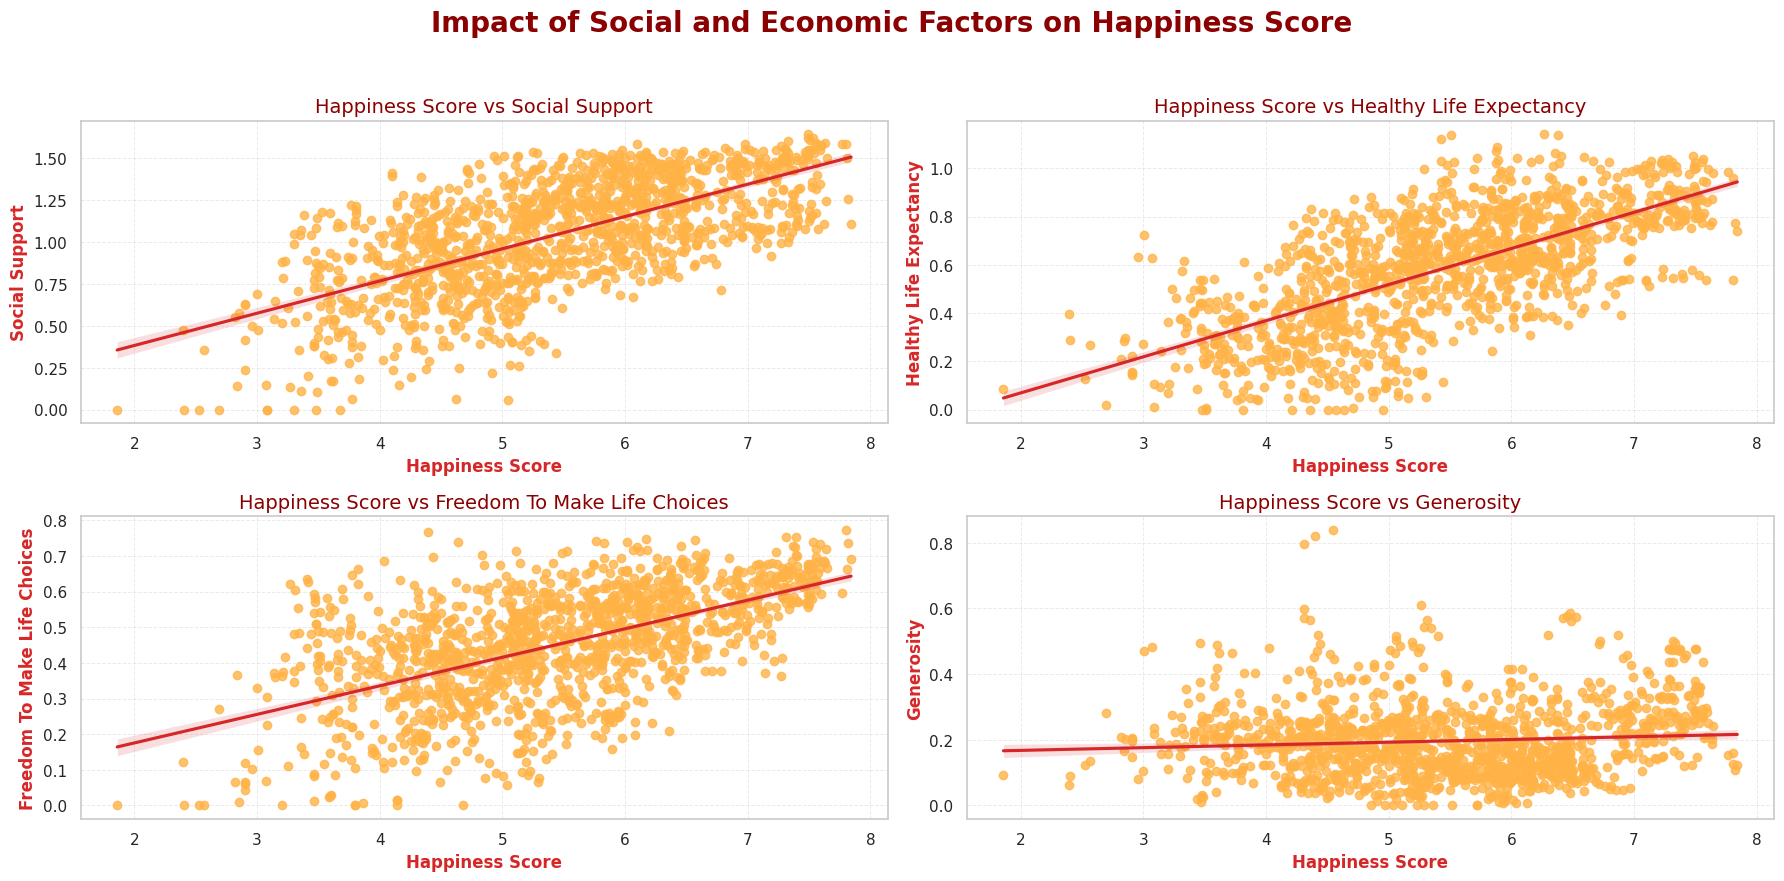

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# List of variables to plot against happiness_score
variables_to_plot = ['social_support', 'healthy_life_expectancy',
                     'freedom_to_make_life_choices', 'generosity']

# Create scatter plots for happiness_score vs. each variable with a regression line
plt.figure(figsize=(18, 12))

for idx, var in enumerate(variables_to_plot, start=1):
    plt.subplot(3, 2, idx)
    sns.regplot(
        data=merged_df,
        x='happiness_score',
        y=var,
        scatter_kws={'alpha': 0.8, 'color': '#FFB347'},  # Orange scatter points
        line_kws={'color': '#D62728'}  # Dark Red regression line
    )
    plt.title(f'Happiness Score vs {var.replace("_", " ").title()}', fontsize=14, color='darkred')
    plt.xlabel('Happiness Score', fontsize=12, color='#D62728',fontweight='bold')
    plt.ylabel(var.replace("_", " ").title(), fontsize=12, color='#D62728',fontweight='bold')
    plt.grid(True, alpha=0.4, linestyle='--', linewidth=0.7)

# Add a title for the entire figure
plt.suptitle("Impact of Social and Economic Factors on Happiness Score",
             fontsize=20, fontweight='bold', y=1.02, color='darkred')

plt.tight_layout()
plt.show()





### **Impact of Freedom to Make Life Choices and Healthy Life Expectancy on Happiness**

The bubble chart below visualizes the relationship between happiness score and freedom to make life choices, with bubble size representing healthy life expectancy.  

- **Bubble Size**: The size of each bubble is proportional to the country's healthy life expectancy.  
- **Color Gradient**: The yellow-orange-red color gradient indicates the happiness score, with dark red representing higher scores.  
- **Focus**: This chart helps identify patterns in how freedom to make life choices and healthy life expectancy impact happiness across different countries.


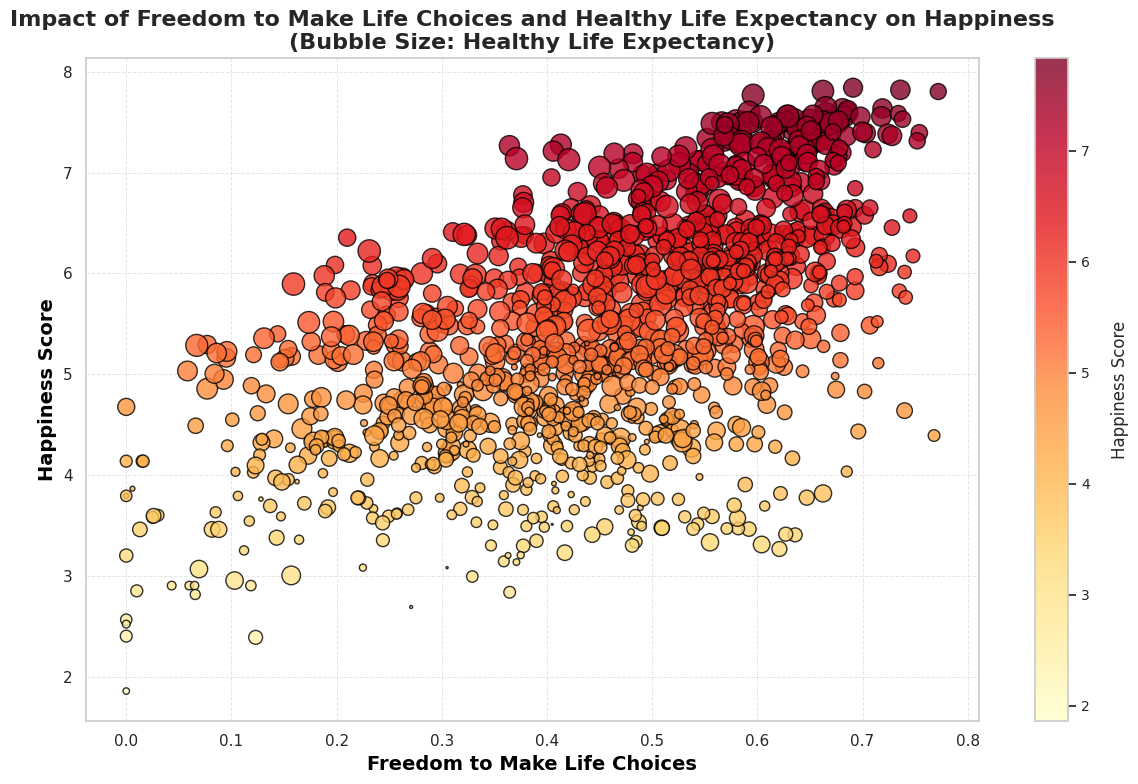

In [ ]:

import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    merged_df['freedom_to_make_life_choices'],
    merged_df['happiness_score'],
    s=merged_df['healthy_life_expectancy'] * 250,  # Bubble size represents healthy_life_expectancy
    c=merged_df['happiness_score'],  # Color represents happiness score
    cmap='YlOrRd',  # Yellow-Orange-Red colormap
    alpha=0.8,
    edgecolor='black'  # Add black borders for sharp contrast
)

# Add a colorbar with an improved label
cbar = plt.colorbar(scatter)
cbar.set_label('Happiness Score', fontsize=12, labelpad=15)
cbar.ax.tick_params(labelsize=10)

# Labels and title
plt.xlabel('Freedom to Make Life Choices', fontsize=14, color='black',fontweight='bold')
plt.ylabel('Happiness Score', fontsize=14, color='black',fontweight='bold')
plt.title(
    'Impact of Freedom to Make Life Choices and Healthy Life Expectancy on Happiness\n(Bubble Size: Healthy Life Expectancy)',
    fontsize=16,
    fontweight='bold'


)

# Add gridlines with enhanced aesthetics
plt.grid(alpha=0.5, linestyle='--', linewidth=0.7)

# Improve layout and display
plt.tight_layout()
plt.show()



### **GDP per Capita vs. Happiness Score**

The scatter plot below illustrates the relationship between GDP per capita and happiness scores across countries, with the following features:

- **Color Gradient**: The yellow-orange-red colormap indicates the happiness score, with darker shades of red representing higher scores and lighter shades of orange indicating lower scores.
- **Marker Size**: Each data point is represented by a bubble.
- **Insights**: This chart helps identify trends in how GDP per capita correlates with happiness levels, providing a visual comparison of wealth and across countries.



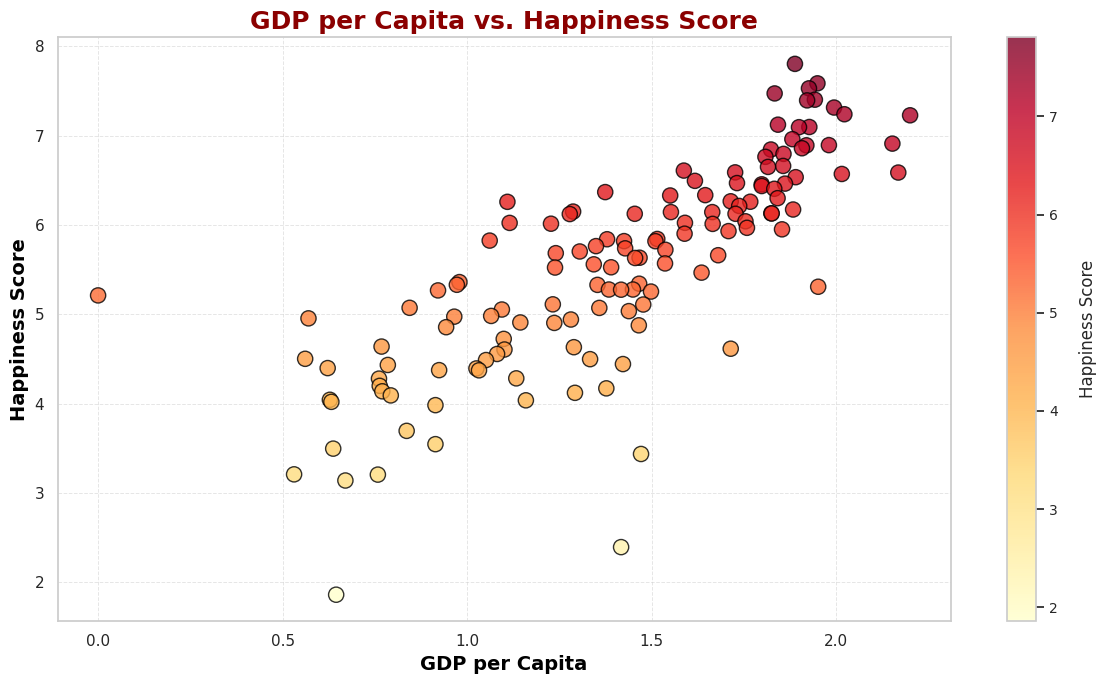

In [ ]:

# Scatter plot: GDP per Capita vs. Happiness Score
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Use a yellow-orange-red colormap
scatter = plt.scatter(
    df['gdp_per_capita'],
    df['happiness_score'],
    c=df['happiness_score'],  # Color by happiness score
    cmap='YlOrRd',  # Yellow-Orange-Red colormap
    alpha=0.8,
    s=120,  # Slightly larger markers
    edgecolor='black'  # Add black borders for sharp contrast
)

# Add a colorbar with a better label
cbar = plt.colorbar(scatter)
cbar.set_label('Happiness Score', fontsize=12, labelpad=15)
cbar.ax.tick_params(labelsize=10)

# Add a title and labels with increased font size
plt.title("GDP per Capita vs. Happiness Score", fontsize=18, fontweight='bold', color='darkred')
plt.xlabel("GDP per Capita", fontsize=14, color='black',fontweight='bold')
plt.ylabel("Happiness Score", fontsize=14, color='black',fontweight='bold')

# Add gridlines with enhanced aesthetics
plt.grid(alpha=0.5, linestyle='--', linewidth=0.7)

# Improve layout and display
plt.tight_layout()
plt.show()




### **Distribution of Corruption by Year**

This violin plot visually represents the distribution of perceptions of corruption over different years:

- **X-Axis**: Year
- **Y-Axis**: Perceptions of corruption, indicating how corruption is viewed across various countries.
- **Color Palette**: A Yellow-Orange-Red colormap is used to represent varying levels of perceptions of corruption, with darker shades of red indicating higher perceptions of corruption.

The plot provides insight into how the perception of corruption has evolved over time, allowing us to see trends and variations in different years.



<ipython-input-8-7078d09bfb5e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


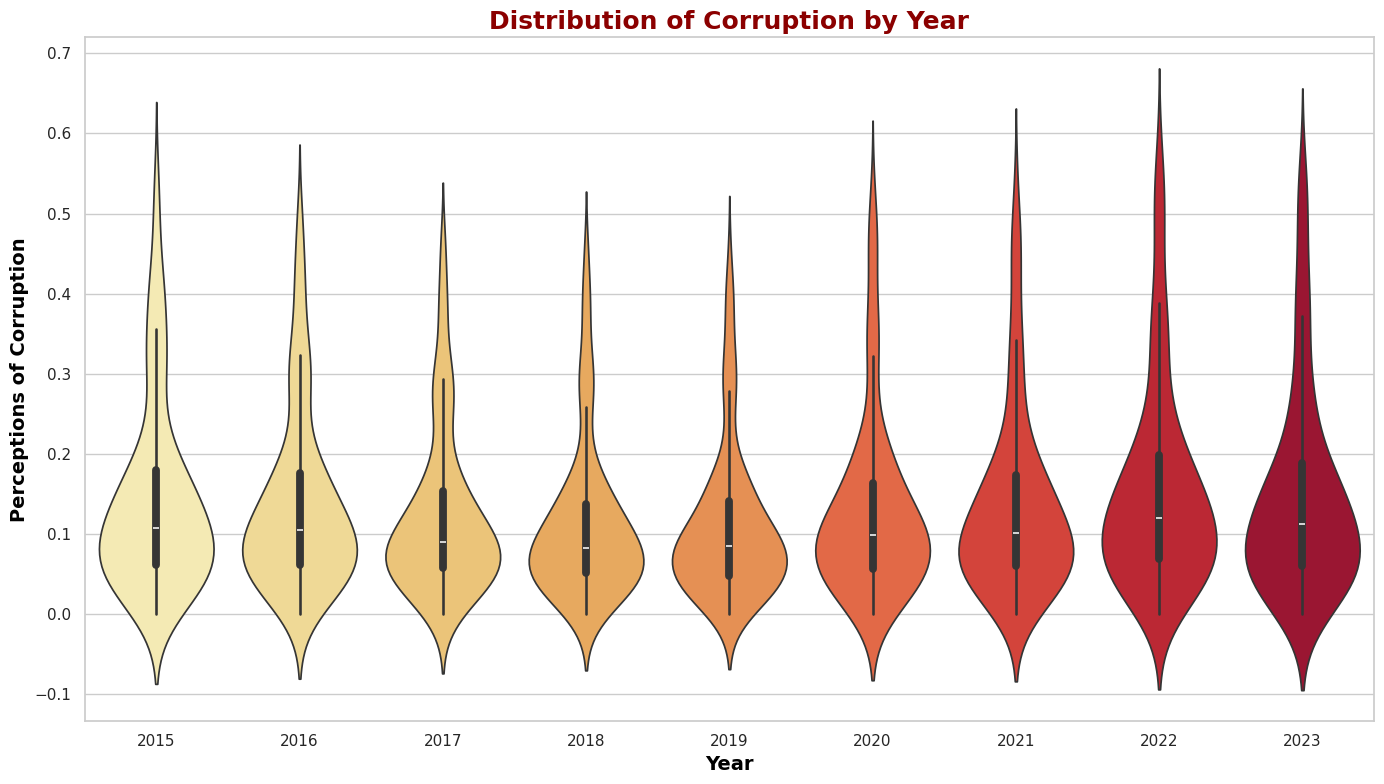

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set a Yellow-Orange-Red color palette
plt.figure(figsize=(14, 8))
sns.violinplot(
    x='year',
    y='perceptions_of_corruption',
    data=merged_df,
    palette=sns.color_palette("YlOrRd", n_colors=len(merged_df['year'].unique()))  # Dynamic palette
)

# Add a title with better styling
plt.title('Distribution of Corruption by Year', fontsize=18, fontweight='bold', color='darkred')

# Customize the labels with more elegant font sizes
plt.xlabel('Year', fontsize=14, fontweight='bold', color='black')
plt.ylabel('Perceptions of Corruption', fontsize=14, fontweight='bold', color='black')

# Tight layout to make the plot more compact and ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()




### Visualization of Happiest Countries, High GDP, High Life Expectancy, and High Social Support Countries

The code below visualizes a world map that highlights countries based on their performance in different categories:

1. **Happiest Countries** (Top 25% happiness scores) - represented by **yellow circles**.
2. **High GDP Countries** (Top 25% GDP per capita) - represented by **forest green triangles**.
3. **High Life Expectancy Countries** (Top 25% healthy life expectancy) - represented by **red squares**.
4. **High Social Support Countries** (Top 25% social support) - represented by **blue diamonds**.

Key steps include:

- **Jittering**: Slight random shifts are applied to the country centroids to prevent overlapping of points.
- **Markers**: Different marker shapes and sizes are used for each category, and transparency is adjusted for better visibility.
- **Legend**: A legend is added to distinguish the categories, and the title is styled for better presentation.

This visualization gives a comparative view of countries' performance across multiple dimensions of happiness, with clear markers representing each category on a world map.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


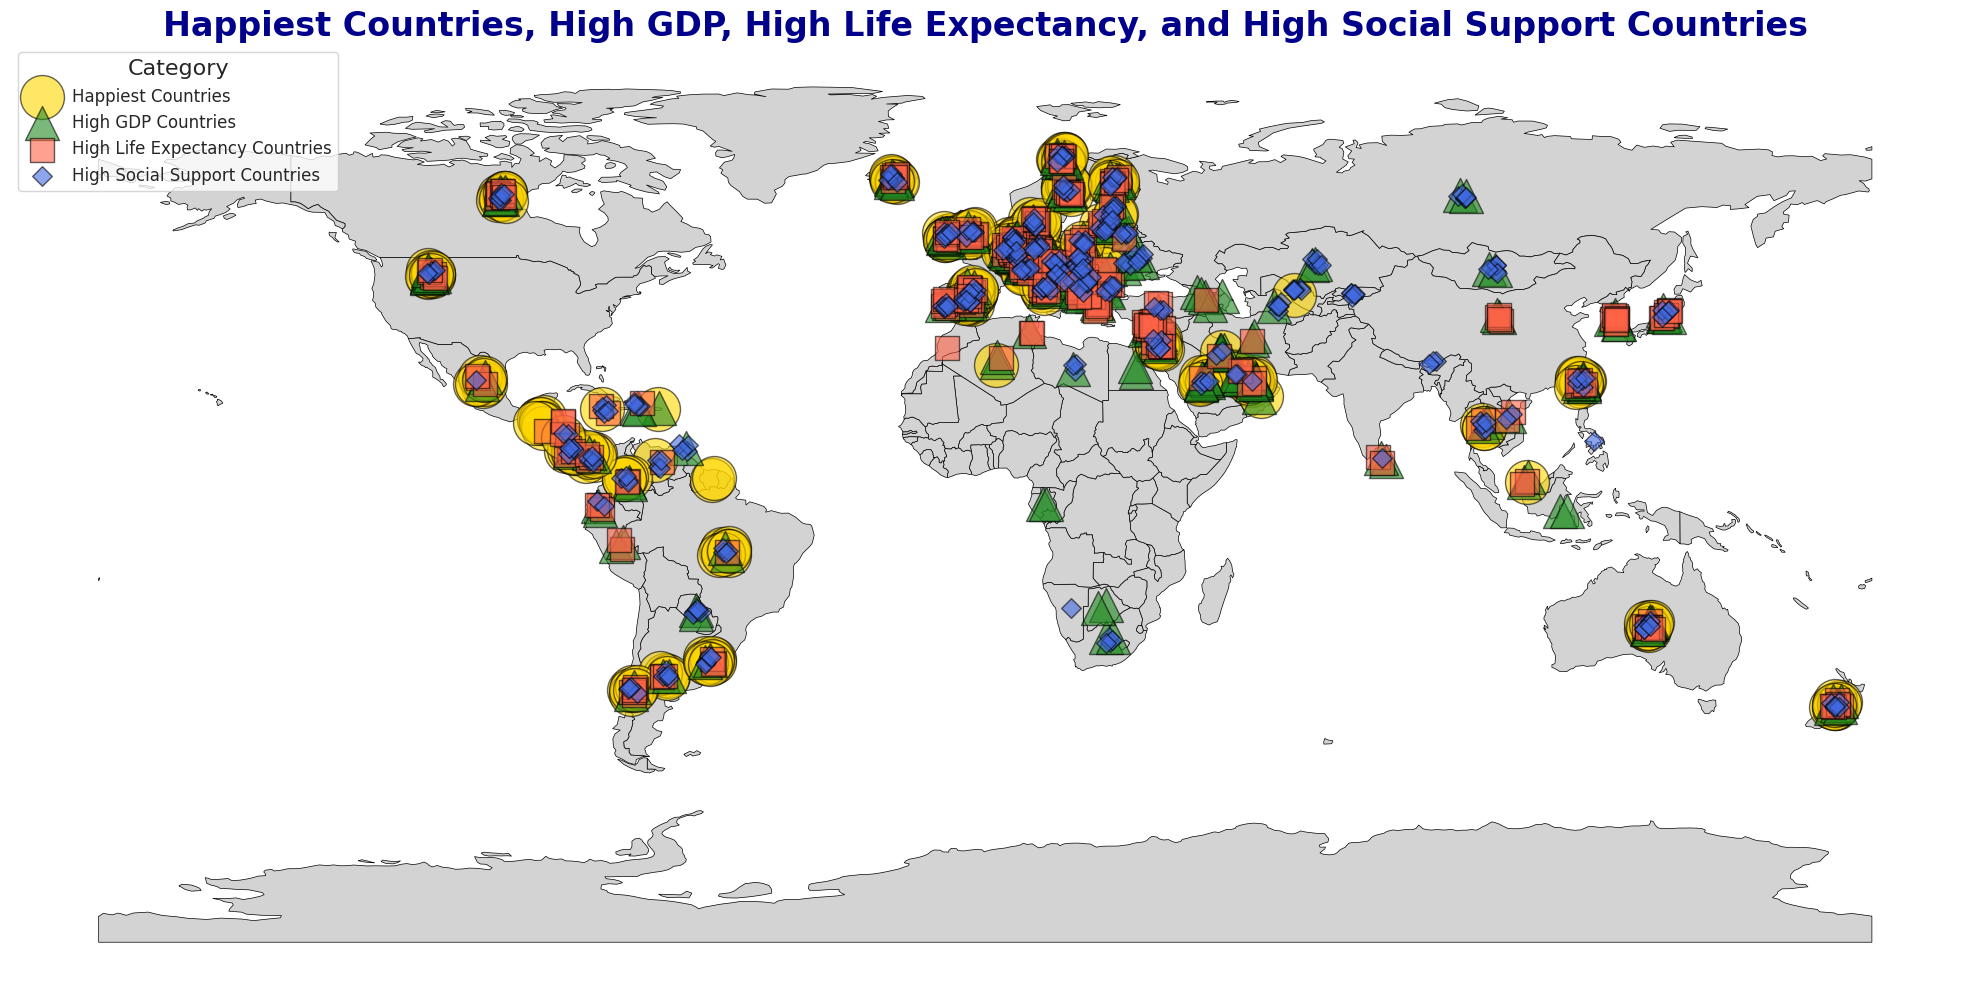

In [ ]:



import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Step 1: Load the world shapefile data (Natural Earth countries shapefile)
shapefile_path = '/content/drive/MyDrive/IS Mid Term Report/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Step 2: Load your happiness, GDP, life expectancy, and social support data (Replace 'merged_df' with your actual DataFrame)
# merged_df = pd.read_csv('merged_happiness_data.csv')  # Uncomment and replace with the correct path

# Step 3: Define thresholds for happiness score, GDP, life expectancy, and social support
happiness_threshold = merged_df['happiness_score'].quantile(0.75)  # Top 25% happiest countries
gdp_threshold = merged_df['gdp_per_capita'].quantile(0.75)  # Top 25% GDP countries
life_expectancy_threshold = merged_df['healthy_life_expectancy'].quantile(0.75)  # Top 25% life expectancy countries
social_support_threshold = merged_df['social_support'].quantile(0.75)  # Top 25% social support countries

# Step 4: Filter the data for happiest countries, high GDP countries, high life expectancy countries, and high social support countries
happiest_countries = merged_df[merged_df['happiness_score'] > happiness_threshold]
high_gdp_countries = merged_df[merged_df['gdp_per_capita'] > gdp_threshold]
high_life_expectancy_countries = merged_df[merged_df['healthy_life_expectancy'] > life_expectancy_threshold]
high_social_support_countries = merged_df[merged_df['social_support'] > social_support_threshold]

# Step 5: Merge world map with happiest countries, high GDP countries, high life expectancy countries, and high social support countries to get their centroids
world['centroid'] = world.geometry.centroid  # Calculate country centroids
centroid_df = world[['NAME', 'centroid']]  # Change 'NAME' if needed based on column names

# Merge with happiest countries
happiest_with_coords = pd.merge(happiest_countries, centroid_df, left_on='country', right_on='NAME', how='inner')

# Merge with high GDP countries
high_gdp_with_coords = pd.merge(high_gdp_countries, centroid_df, left_on='country', right_on='NAME', how='inner')

# Merge with high life expectancy countries
high_life_expectancy_with_coords = pd.merge(high_life_expectancy_countries, centroid_df, left_on='country', right_on='NAME', how='inner')

# Merge with high social support countries
high_social_support_with_coords = pd.merge(high_social_support_countries, centroid_df, left_on='country', right_on='NAME', how='inner')

# Extract x and y coordinates from the centroid geometries for all categories
happiest_with_coords['centroid_x'] = happiest_with_coords['centroid'].apply(lambda geom: geom.x)
happiest_with_coords['centroid_y'] = happiest_with_coords['centroid'].apply(lambda geom: geom.y)

high_gdp_with_coords['centroid_x'] = high_gdp_with_coords['centroid'].apply(lambda geom: geom.x)
high_gdp_with_coords['centroid_y'] = high_gdp_with_coords['centroid'].apply(lambda geom: geom.y)

high_life_expectancy_with_coords['centroid_x'] = high_life_expectancy_with_coords['centroid'].apply(lambda geom: geom.x)
high_life_expectancy_with_coords['centroid_y'] = high_life_expectancy_with_coords['centroid'].apply(lambda geom: geom.y)

high_social_support_with_coords['centroid_x'] = high_social_support_with_coords['centroid'].apply(lambda geom: geom.x)
high_social_support_with_coords['centroid_y'] = high_social_support_with_coords['centroid'].apply(lambda geom: geom.y)

# Step 6: Add jitter to prevent overlap
def jitter_coordinates(df, jitter_strength=1.0):
    df['centroid_x_jittered'] = df['centroid_x'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df))
    df['centroid_y_jittered'] = df['centroid_y'] + np.random.uniform(-jitter_strength, jitter_strength, size=len(df))
    return df

happiest_with_coords = jitter_coordinates(happiest_with_coords)
high_gdp_with_coords = jitter_coordinates(high_gdp_with_coords)
high_life_expectancy_with_coords = jitter_coordinates(high_life_expectancy_with_coords)
high_social_support_with_coords = jitter_coordinates(high_social_support_with_coords)

# Step 7: Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(20, 10))  # Adjusted figsize for better visibility

# Plot the world map with a lighter background
world.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5)

# Step 8: Plot the happiest countries, high GDP countries, high life expectancy countries, and high social support countries
# Use more appealing colors and larger, more transparent markers
ax.scatter(happiest_with_coords['centroid_x_jittered'], happiest_with_coords['centroid_y_jittered'],
           c='gold', s=1000, alpha=0.6, edgecolor='black', marker='o', label='Happiest Countries')  # Larger size, soft transparency

ax.scatter(high_gdp_with_coords['centroid_x_jittered'], high_gdp_with_coords['centroid_y_jittered'],
           c='forestgreen', s=600, alpha=0.6, edgecolor='black', marker='^', label='High GDP Countries')  # Moderate size, soft transparency

ax.scatter(high_life_expectancy_with_coords['centroid_x_jittered'], high_life_expectancy_with_coords['centroid_y_jittered'],
           c='tomato', s=300, alpha=0.6, edgecolor='black', marker='s', label='High Life Expectancy Countries')  # Moderate size, soft transparency

ax.scatter(high_social_support_with_coords['centroid_x_jittered'], high_social_support_with_coords['centroid_y_jittered'],
           c='royalblue', s=100, alpha=0.6, edgecolor='black', marker='D', label='High Social Support Countries')  # Smaller size, soft transparency


# Step 9: Add legend and title
ax.legend(title='Category', title_fontsize=16, fontsize=12, loc='upper left')
ax.set_title('Happiest Countries, High GDP, High Life Expectancy, and High Social Support Countries', fontsize=24, fontweight='bold', color='darkblue')
ax.set_axis_off()  # Hide axes for a cleaner map

# Step 10: Show the plot
plt.tight_layout()
plt.show()



# Extra Visualization plots Used for Understanding the data in a deeper context
### Data Understanding through Visualizations

I used the following plots below to explore and understand the data in detail and observe how the various factors (such as happiness score, GDP, life expectancy, and social support) affect each other. These visualizations helped to identify patterns, trends, and correlations before selecting the final visualizations above.


Mounted at /content/drive


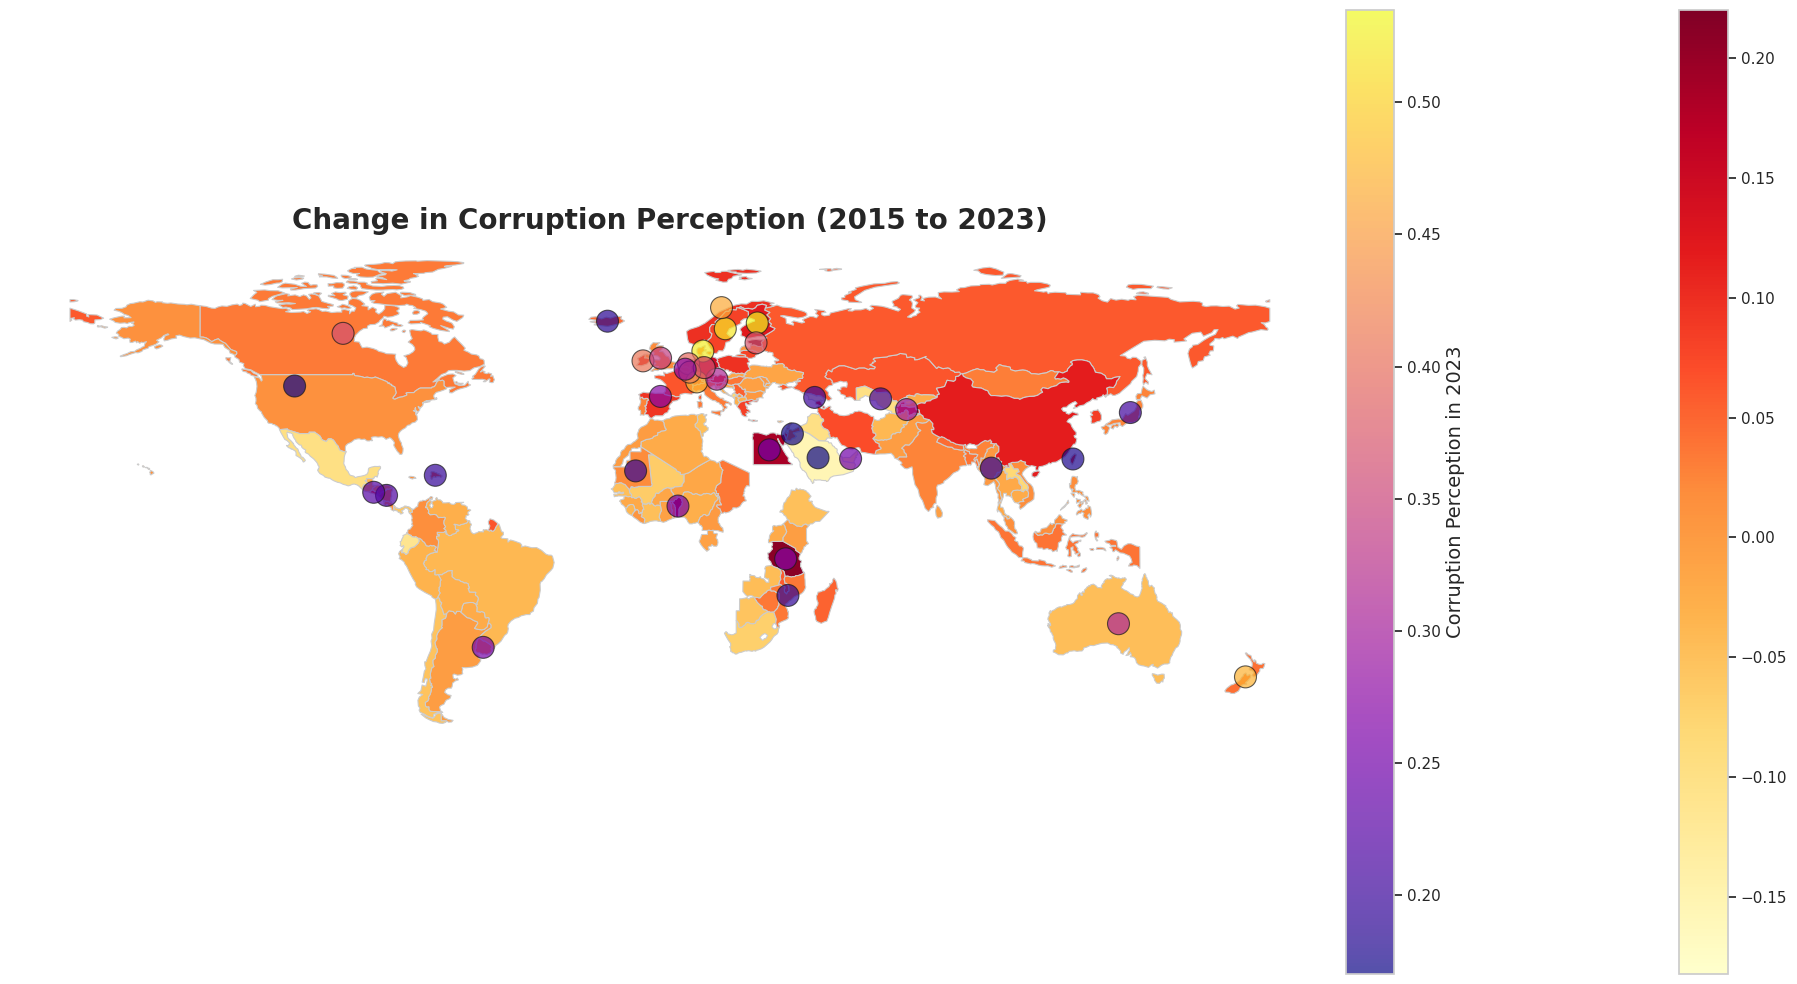

In [ ]:


import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np

# Mount Google Drive to access files
drive.mount('/content/drive', force_remount=True)

# Step 1: Load the world shapefile data (Natural Earth countries shapefile)
shapefile_path = '/content/drive/MyDrive/IS Mid Term Report/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Step 2: Load your corruption data (adjust the path accordingly)
# merged_df = pd.read_csv('merged_happiness_data.csv')  # Uncomment and replace with the correct path

# Step 3: Filter the data for the years 2015 and 2023
df_2015 = merged_df[merged_df['year'] == 2015]
df_2023 = merged_df[merged_df['year'] == 2023]

# Step 4: Calculate the change in corruption from 2015 to 2023
corruption_2015 = df_2015[['country', 'perceptions_of_corruption']].rename(columns={'perceptions_of_corruption': 'corruption_2015'})
corruption_2023 = df_2023[['country', 'perceptions_of_corruption']].rename(columns={'perceptions_of_corruption': 'corruption_2023'})

# Merge the data to calculate the change in corruption
corruption_change = pd.merge(corruption_2015, corruption_2023, on='country')
corruption_change['corruption_change'] = corruption_change['corruption_2023'] - corruption_change['corruption_2015']

# Step 5: Merge corruption change data with world data
world = world.rename(columns={'NAME': 'country'})  # Rename for consistency
world_data = pd.merge(world, corruption_change[['country', 'corruption_change']], on='country', how='left')

# Step 6: Create the choropleth map for corruption change from 2015 to 2023 with a distinct color map
fig, ax = plt.subplots(1, 1, figsize=(20, 10))  # Adjust figure size for better visibility

# Plot the world map with the corruption change data using a visually appealing 'YlOrRd' color map
world_data.plot(column='corruption_change', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add colorbar for the corruption change background map
ax.set_title('Change in Corruption Perception (2015 to 2023)', fontsize=20, fontweight='bold')
ax.set_axis_off()  # Hide axes for a cleaner map

# Step 7: Overlay the radiating points for high corruption in 2023
# Filter out countries with high corruption in 2023
high_corruption_threshold = merged_df['perceptions_of_corruption'].quantile(0.75)
high_corruption_df = merged_df[merged_df['perceptions_of_corruption'] >= high_corruption_threshold]
high_corruption_df_2023 = high_corruption_df[high_corruption_df['year'] == 2023]

# Merge with world data to get centroids
world['centroid'] = world.geometry.centroid  # Calculate country centroids
centroid_df = world[['country', 'centroid']]  # Create a DataFrame with centroids
corruption_with_coords = pd.merge(high_corruption_df_2023, centroid_df, on='country', how='inner')

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(corruption_with_coords, geometry=corruption_with_coords['centroid'])

# Spread the points in a radiating manner by adding a random radial offset
spread_factor = 0.1  # Controls the spread of points (adjust this value for more/less spread)
random_angles = np.random.uniform(0, 2 * np.pi, len(gdf))  # Generate random angles for each point
random_distances = np.random.uniform(0, spread_factor, len(gdf))  # Generate random distances for each point
x_offsets = np.cos(random_angles) * random_distances
y_offsets = np.sin(random_angles) * random_distances

# Apply the offsets to the centroid coordinates
gdf['x_spread'] = gdf.geometry.x + x_offsets
gdf['y_spread'] = gdf.geometry.y + y_offsets

# Plot the radiating points on top of the map using a distinct color map like 'plasma' for better contrast
scatter = ax.scatter(
    gdf['x_spread'], gdf['y_spread'],
    c=gdf['perceptions_of_corruption'],  # Color by corruption rate
    cmap='plasma',  # Using 'plasma' for a visually appealing color map
    s=250, alpha=0.7, edgecolor='k', marker='o', linewidth=0.8
)

# Add a colorbar for the corruption points
cbar = fig.colorbar(scatter, ax=ax, orientation="vertical", pad=0.01)
cbar.set_label('Corruption Perception in 2023', fontsize=14)

# Show the final map with choropleth and radiating points
plt.tight_layout()
plt.show()





In [ ]:
import plotly.express as px

# Plotting a choropleth map
fig = px.choropleth(
    df,
    locations='country',  # Column with country names
    locationmode='country names',
    color='happiness_score',  # Color based on happiness score
    hover_name='country',  # Information shown on hover
    title='World Happiness Map',
    color_continuous_scale=px.colors.sequential.Plasma
)

fig.show()


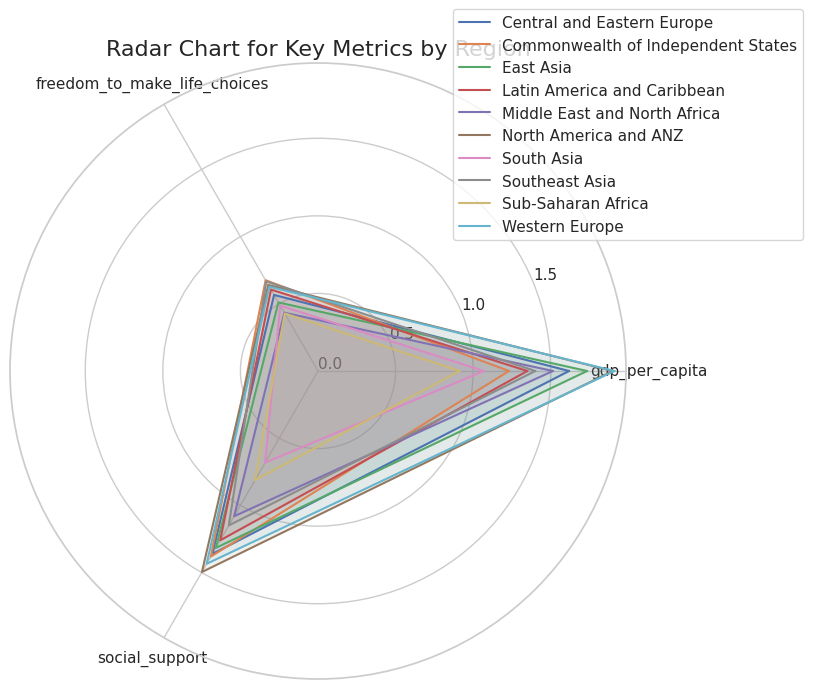

In [ ]:
import numpy as np
from math import pi

# Aggregate data by region
radar_df = df.groupby('region')[['gdp_per_capita', 'freedom_to_make_life_choices', 'social_support']].mean()

# Radar chart
categories = radar_df.columns
num_vars = len(categories)

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for region, row in radar_df.iterrows():
    values = row.tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=region)
    ax.fill(angles, values, alpha=0.1)

ax.set_yticks(np.arange(0, 2.0, 0.5))
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title("Radar Chart for Key Metrics by Region", fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


<ipython-input-14-48be28d95777>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




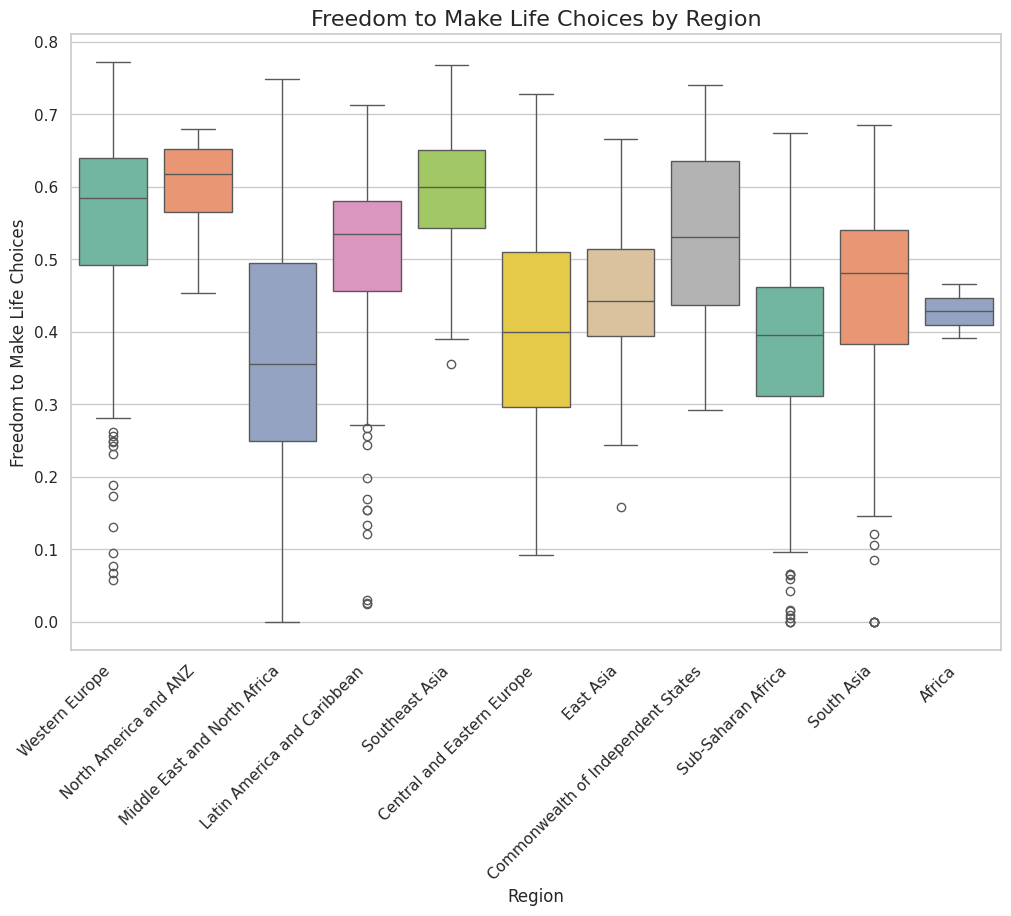

In [ ]:
# Boxplot of Freedom to Make Life Choices by Region
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df, x='region', y='freedom_to_make_life_choices', palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.title('Freedom to Make Life Choices by Region', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Freedom to Make Life Choices')
plt.show()


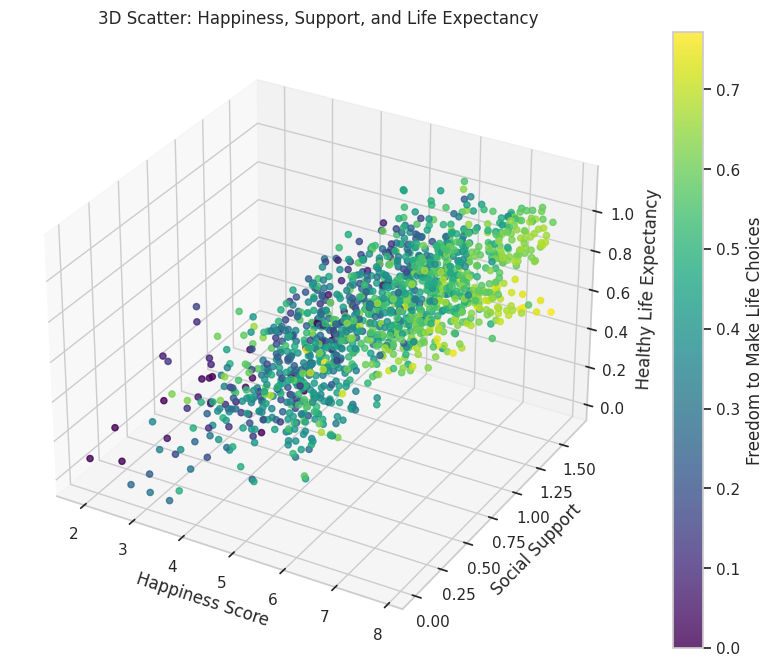

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter: Happiness Score, Social Support, and Healthy Life Expectancy
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(merged_df['happiness_score'], merged_df['social_support'],
                     merged_df['healthy_life_expectancy'],
                     c=merged_df['freedom_to_make_life_choices'], cmap='viridis', alpha=0.8)
ax.set_xlabel('Happiness Score')
ax.set_ylabel('Social Support')
ax.set_zlabel('Healthy Life Expectancy')
plt.colorbar(scatter, ax=ax, label='Freedom to Make Life Choices')
plt.title('3D Scatter: Happiness, Support, and Life Expectancy')
plt.show()


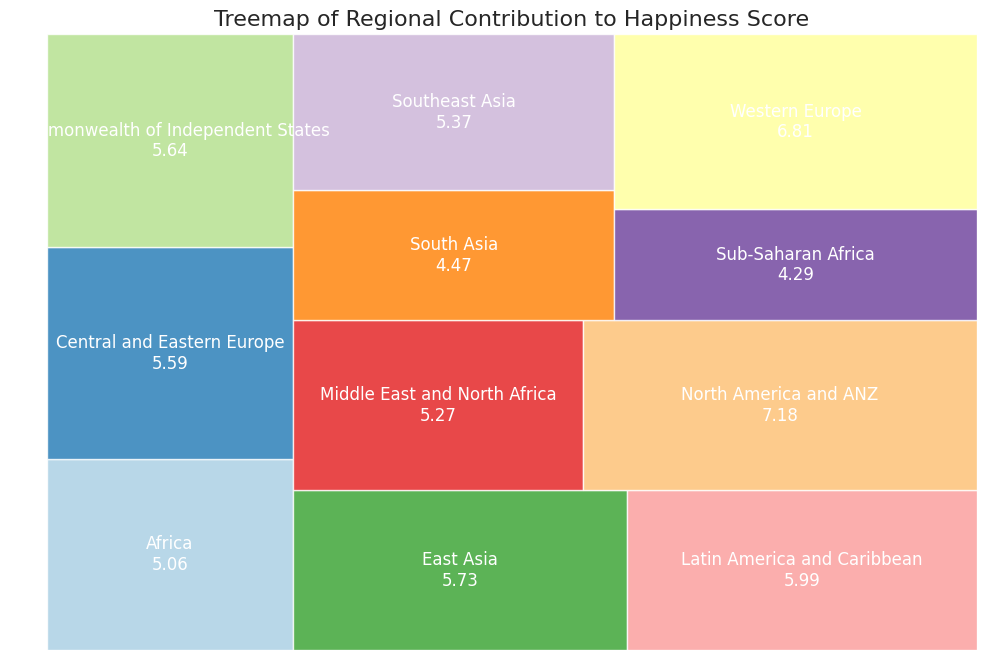

In [ ]:
!pip install squarify

import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating average happiness scores by region
region_happiness = merged_df.groupby('region')['happiness_score'].mean()

# Treemap
plt.figure(figsize=(12, 8))

# Define the colors for the regions
colors = sns.color_palette("Paired", len(region_happiness))

# Plot the treemap
squarify.plot(sizes=region_happiness.values, color=colors, alpha=0.8)

# Add labels manually
for i, rect in enumerate(plt.gca().patches):
    # Getting the center of each rectangle (for labeling)
    x, y, width, height = rect.get_bbox().bounds
    label = f"{region_happiness.index[i]}\n{region_happiness.values[i]:.2f}"
    plt.text(x + width/2, y + height/2, label, ha="center", va="center", fontsize=12, color="white")

# Add title and remove axis
plt.title("Treemap of Regional Contribution to Happiness Score", fontsize=16)
plt.axis('off')

# Show the plot
plt.show()


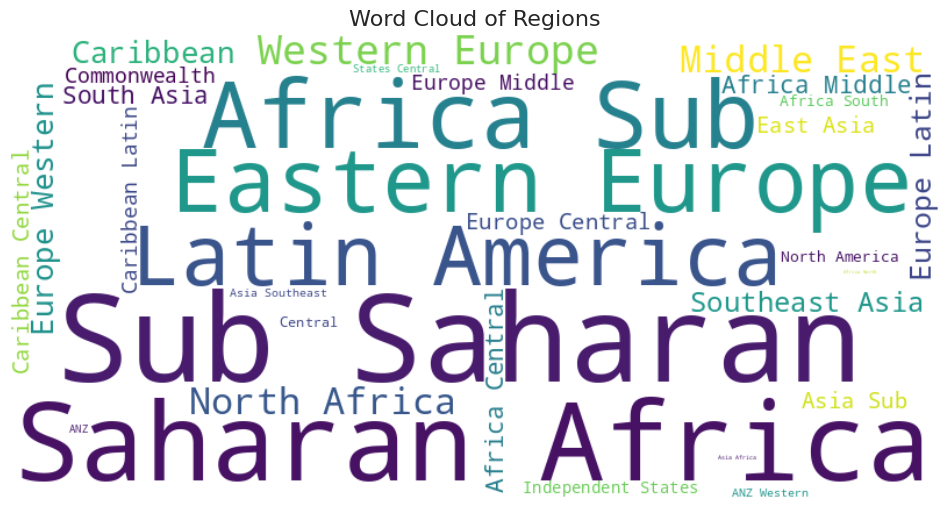

In [ ]:
from wordcloud import WordCloud

# Word cloud for regions
region_text = ' '.join(merged_df['region'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(region_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Regions', fontsize=16)
plt.show()


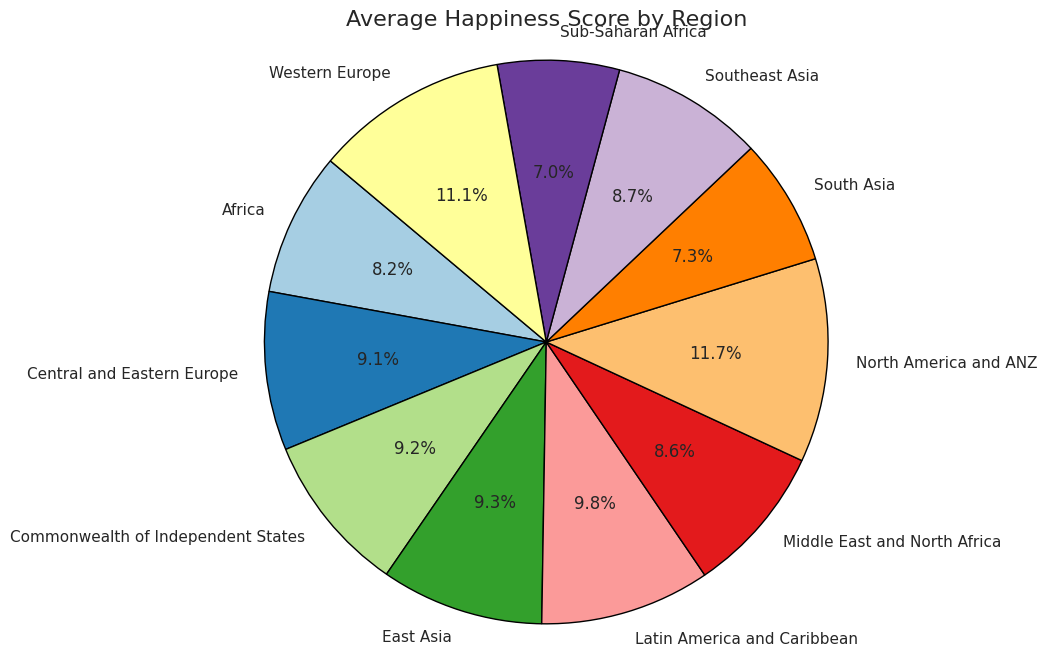

In [ ]:
import matplotlib.pyplot as plt

# Aggregating average happiness scores by region
region_happiness = merged_df.groupby('region')['happiness_score'].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_happiness, labels=region_happiness.index, autopct='%1.1f%%', startangle=140,
        colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})
plt.title('Average Happiness Score by Region', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [ ]:
# Sorting the merged_df DataFrame by happiness_score in ascending order
sorted_df = merged_df.sort_values(by='happiness_score', ascending=False)

# Display the sorted DataFrame
res= sorted_df[['region', 'happiness_score']].head(30)
res


region  happiness_score
935   Western Europe           7.8420
1084  Western Europe           7.8210
782   Western Europe           7.8087
1230  Western Europe           7.8040
626   Western Europe           7.7690
783   Western Europe           7.6456
1085  Western Europe           7.6360
470   Western Europe           7.6320
936   Western Europe           7.6200
627   Western Europe           7.6000
471   Western Europe           7.5940
0     Western Europe           7.5870
1231  Western Europe           7.5860
937   Western Europe           7.5710
1     Western Europe           7.5610
784   Western Europe           7.5599
1086  Western Europe           7.5570
472   Western Europe           7.5550
938   Western Europe           7.5540
628   Western Europe           7.5540
315   Western Europe           7.5370
1232  Western Europe           7.5300
2     Western Europe           7.5270
158   Western Europe           7.5260
3     Western Europe           7.5220
316   Western Europe           7.5220
1087  Western Europe           7.5120
159   Western Europe           7.5090
785   Western Europe           7.5045
317   Western Europe           7.5040